# WeatherPy
----

### Analysis
*The graph of temperature vs latitude clearly shows a relationship between closness to the equator and warmer temperatures. The north side of the equator is a little more cool than the southern half and the discrepencies in temperature could be caused from the Earth being tilted on its axis.

*Latitude barely had any relationship with humidity other than the humidity levels of latitudes close to the equator being near 100%. The rest of the latitudes had low correlation to humidity with no discernable trend.

*Cloudiness is probably the least influenced by latitudes with their datapoints being all over the place

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#initialize lists
cities_list = []
clouds = []
country = []
date = []
humidity = []
lat = []
lon = []
temp_max = []
wind = []


#get api_key from api_keys resource
from api_keys import api_key

start_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+api_key+"&q="

print("<____Data Retrieval Start____>")


#loop to get information for each city
for city in cities:
    time.sleep(1) #slows the loop so API requests don't get overloaded
    url = start_url + city
    response = requests.get(url).json()
    #exception handling for "city not found" case
    try:
        if response["message"] == "city not found":
            print("City not found. Skipping...")
            
    except:
        print("Processing City: " + city)
        cities_list.append(city)
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        wind.append(response["wind"]["speed"])

    
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

<____Data Retrieval Start____>
Processing City: upernavik
Processing City: ilulissat
Processing City: kota tinggi
Processing City: port elizabeth
Processing City: albany
Processing City: lompoc
Processing City: vaini
Processing City: yuli
Processing City: santa ines
Processing City: maine-soroa
Processing City: hilo
Processing City: rikitea
Processing City: praia da vitoria
Processing City: namibe
Processing City: muroto
Processing City: puerto ayora
Processing City: tuatapere
Processing City: muhos
Processing City: new norfolk
Processing City: cabo san lucas
City not found. Skipping...
Processing City: ende
Processing City: touros
Processing City: borogontsy
Processing City: nanortalik
City not found. Skipping...
Processing City: naze
Processing City: biak
Processing City: nacala
Processing City: ambilobe
Processing City: muros
Processing City: vysokovsk
Processing City: dolovo
Processing City: ribeira grande
Processing City: khatanga
Processing City: jamsa
Processing City: gweta
Proc

Processing City: yumen
City not found. Skipping...
Processing City: hamilton
Processing City: ullal
Processing City: aykhal
Processing City: zhuhai
Processing City: valparaiso
Processing City: kaitangata
Processing City: mar del plata
Processing City: port hardy
Processing City: nisia floresta
Processing City: kisangani
Processing City: sanary-sur-mer
Processing City: eyrarbakki
Processing City: ballina
Processing City: qeshm
Processing City: cayenne
Processing City: catalina
Processing City: laredo
Processing City: zhob
Processing City: nuuk
Processing City: bunia
City not found. Skipping...
Processing City: eureka
Processing City: saint-pierre
Processing City: jaltenango
Processing City: san juan
Processing City: wattegama
Processing City: mount isa
Processing City: kurchum
Processing City: joensuu
Processing City: nauta
Processing City: bongaree
City not found. Skipping...
Processing City: aksu
Processing City: padang
Processing City: luderitz
Processing City: ostrovnoy
Processing C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Puts data in dictionary
weather_data = {"City": cities_list, "Cloudiness": clouds, "Country": country, "Date": date, "Humidity": humidity, "Lat": lat, "Lng": lon, "Max Temp": temp_max, "Wind Speed": wind}
#converts dictionary to dataframe
wdf = pd.DataFrame(weather_data)

wdf.to_csv(output_data_file, index=None, header=True)

#print the first 5 rows
wdf.head()




,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,upernavik,0,GL,1551346002,100,72.79,-56.15,5.05,24.74
1,ilulissat,0,GL,1551346003,69,69.22,-51.10,6.67,4.16
2,kota tinggi,40,MY,1551344434,66,1.73,103.90,89.01,17.22
3,port elizabeth,90,US,1551346001,81,39.31,-74.98,39.00,6.93
4,albany,90,US,1551345883,78,42.65,-73.75,18.00,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

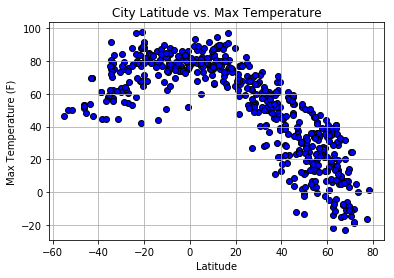

In [5]:
#Create Scatter
plt.scatter(wdf["Lat"], wdf["Max Temp"], c="blue", edgecolor="black")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature")

#Save Image
plt.savefig("output_data/LatTemp.png")

#Show plot
plt.show()

#### Latitude vs. Humidity Plot

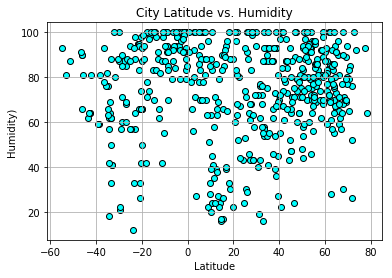

In [6]:
#Create Scatter
plt.scatter(wdf["Lat"], wdf["Humidity"], c="cyan", edgecolor="black")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity)')
plt.title("City Latitude vs. Humidity")

#Save Image
plt.savefig("output_data/LatHum.png")

#Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

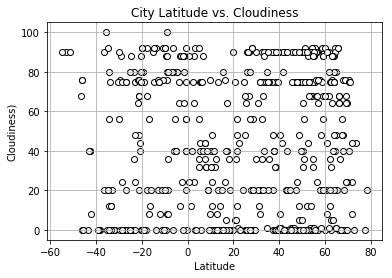

In [7]:
#Create Scatter
plt.scatter(wdf["Lat"], wdf["Cloudiness"], c="white", edgecolor="black")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness)')
plt.title("City Latitude vs. Cloudiness")

#Save Image
plt.savefig("output_data/LatCloud.png")

#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

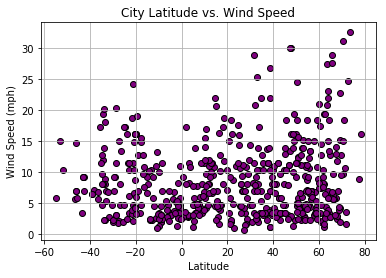

In [8]:
#Create Scatter
plt.scatter(wdf["Lat"], wdf["Wind Speed"], c="purple", edgecolor="black")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed")

#Save Image
plt.savefig("output_data/LatWind.png")

#Show plot
plt.show()